# Preprocessing
- 관절 포인트의 좌표를 두 좌표간의 각도로 변환


In [1]:
import pandas as pd
import math 
df = pd.read_csv('squat_o.csv')
X = df.iloc[:,1:]
X = X.values.tolist()  ## DataFrame을 List값으로 추출
array = []
for i in range(0,500): ## 좌표값을 math.atan2(y,x) * 180 / math.pi로 두 점 사이의 각도값 추출
    array.append([
                math.atan2(X[i][5]-X[i][3],X[i][4]-X[i][2]) *180 / math.pi,
                math.atan2(X[i][7]-X[i][5],X[i][4]-X[i][6]) *180 / math.pi,
                math.atan2(X[i][9]-X[i][7],X[i][8]-X[i][6]) *180 / math.pi
                 ,1]
                )    
result_o = pd.DataFrame(array) ## List를 DataFrame으로 변환
df = pd.read_csv('squat_x.csv')
X = df.iloc[:,1:]
X = X.values.tolist()
array = []
for i in range(0,500): ## 각도값 추출 
    array.append([
                math.atan2(X[i][5]-X[i][3],X[i][4]-X[i][2]) *180 / math.pi,
                math.atan2(X[i][7]-X[i][5],X[i][4]-X[i][6]) *180 / math.pi,
                math.atan2(X[i][9]-X[i][7],X[i][8]-X[i][6]) *180 / math.pi
                 ,0]
                )
    
result_x = pd.DataFrame(array) ## List를 DataFrame으로 변환
result_ox = result_o.append(result_x) ## DataFrame 두개를 합쳐서 새로운 DataFrame 정의
X = result_ox.iloc[0:,:3].values ## 입력 Data 추출
y = result_ox.iloc[0:,[3]].values  ## 정답 Lable 추출


# 모델 테스트
- RF, MLP, GB, SVM, BG에 대하여 각각 10-Fold CrossValidation 학습

In [87]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size = 0.2,
                                                    random_state=1)
stdsc = StandardScaler() ## 정규화 객체 생성

Search_list = [RandomForestClassifier(200), MLPClassifier((100,10)),
               GradientBoostingClassifier(),SVC(), BaggingClassifier(n_estimators = 100)]
Search_Name = ["RandomForestClassifier(200)", "MLPClassifier((100,10))",
               "GradientBoostingClassifier()","SVC()", "BaggingClassifier(n_estimators = 100)"]


train_mean = []
test_mean = []
for i in range(len(Search_list)):
    pipe_lr = make_pipeline(StandardScaler(),  ## 순서대로 진행
                          Search_list[i])
    
    kfold = StratifiedKFold(n_splits=10,
                           random_state=1).split(X_train,y_train)

    scores_train = []
    scores_test = []
    
    for k, (train, test) in enumerate(kfold):
        pipe_lr.fit(X_train[train], y_train[train])
        score_train = pipe_lr.score(X_train[train], y_train[train])
        scores_train.append(score_train)
        score_test = pipe_lr.score(X_train[test], y_train[test])
        scores_test.append(score_test)
        
    train_mean.append(np.mean(scores_train))
    test_mean.append(np.mean(scores_test))
    
    print("Classifier -> ",Search_Name[i])
    print('CV_train 정확도: %.3f +/- %.3f CV_Test 정확도: %.3f +/- %.3f ' %(np.mean(scores_train),np.std(scores_train),np.mean(scores_test),np.std(scores_test)))
    
    

C:\Users\82107\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Classifier ->  RandomForestClassifier(200)
CV_train 정확도: 0.997 +/- 0.001 CV_Test 정확도: 0.935 +/- 0.018 


C:\Users\82107\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

Classifier ->  MLPClassifier((100,10))
CV_train 정확도: 0.932 +/- 0.005 CV_Test 정확도: 0.912 +/- 0.029 


C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Classifier ->  GradientBoostingClassifier()
CV_train 정확도: 0.976 +/- 0.003 CV_Test 정확도: 0.927 +/- 0.024 


C:\Users\82107\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Classifier ->  SVC()
CV_train 정확도: 0.920 +/- 0.003 CV_Test 정확도: 0.916 +/- 0.039 


C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82107\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Classifier ->  BaggingClassifier(n_estimators = 100)
CV_train 정확도: 0.997 +/- 0.001 CV_Test 정확도: 0.930 +/- 0.020 


# Train, Test Data 평균 AUC

[0.9965277777777777, 0.9323611111111111, 0.9762500000000001, 0.9198611111111111, 0.9965277777777777]
[0.9349999999999999, 0.9125, 0.9275, 0.91625, 0.93]


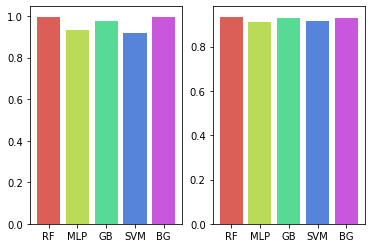

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns


colors = sns.color_palette('hls',5)
plt.subplot(121)
plt.bar(["RF","MLP","GB","SVM","BG"],train_mean, color = colors)
plt.subplot(122)
plt.bar(["RF","MLP","GB","SVM","BG"],test_mean, color = colors)

print(train_mean)
print(test_mean)



In [ ]:
""